# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
# read the data
path_to_file = "/content/drive/MyDrive/UT AI Course/Module 1/Project 1/"
file_name = "foodhub_order.csv"
df = pd.read_csv(path_to_file + file_name)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1,898 rows in the data set and there are a total of 9 columns. The 9 columns are:
  - order_id
  - customer-id
  - restaurant_name
  - cuisine_type
  - cost_of_the_order
  - day_of_the_weekend
  - rating
  - food_preparation_time
  - delivery_time

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
All of the columns appear to be of the correct type, with the exception of the rating column, which should have values of type float. To correct this we can change the "Not given" values to NaN.

In [6]:
id_columns = ["order_id", "customer_id"]
restaurant_name_column = ["restaurant_name"]
numerical_columns = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
non_numerical_columns = ['cuisine_type', 'day_of_the_week']

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here

# First we check all unique values in each column to see if there are any anomalies:

for column in df:
  print(column + ": " + f"{df[column].nunique()}" + " unique values")
  print(df[column].unique())
  print()


order_id: 1898 unique values
[1477147 1477685 1477070 ... 1477819 1477513 1478056]

customer_id: 1200 unique values
[337525 358141  66393 ...  97838 292602 397537]

restaurant_name: 178 unique values
['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Su

In [8]:
# From the previous data the "Not given" data in the rating column has to be changed

# The 'Not given' values should be converted to NaN
df["rating"] = df["rating"].replace(["Not given"],np.nan)

#Then we convert the rating column to int.
df["rating"] = df["rating"].astype(float)

print(df["rating"].unique())
df.head()

[nan  5.  3.  4.]


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [9]:
df.isnull().sum()

# We already expect rating to have a significant amount of NaN data since we just changed the "Not Given" tag to NaN for cleanliness.

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
 With this now we can perform statistical analysis over all numerical columns with ease.

 In the 'restaurant_name' column there are also some non-alphanumeric characters which are probably characters in other languages. These could be removed but would not provide any value to the data.

 Along with that we can notice that there are 1,898 unique order_ids so there is no reason to speculate there is an error in id generation.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Write your code here
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00000,1477495.50000,548.04972,1476547.00000,1477021.25000,1477495.50000,1477969.75000,1478444.00000
customer_id,1898.00000,171168.47840,113698.13974,1311.00000,77787.75000,128600.00000,270525.00000,405334.00000
cost_of_the_order,1898.00000,16.49885,7.48381,4.47000,12.08000,14.14000,22.29750,35.41000
rating,1162.00000,4.34423,0.74148,3.00000,4.00000,5.00000,5.00000,5.00000
food_preparation_time,1898.00000,27.37197,4.63248,20.00000,23.00000,27.00000,31.00000,35.00000
delivery_time,1898.00000,24.16175,4.97264,15.00000,20.00000,25.00000,28.00000,33.00000


#### Observations:
Analysing 'cost_of_the_order': It appears that the distribution is right skewed, as the mean and 50th percentile are around 0.5 standard deviation appart. The mean of this data is ~\$16.50 with the minimum cost of order being \$4.47 and the maximum being \$35.4.

Analyzing 'rating': The average rating is 4.344 for the 1,162 restaurants with rating out of the 1,898 data points. The minimum rating is 3, whcih means taht the quality of restaurants is high.

Analyzing 'food_preparation_time': The average time to prepare food is 27.37 minutes with that being close to the 50th percentile of the data. THe minimum amount taken is 20 mins, while the maximum is 35.

Analyzing 'delivery_time': The average time taken to deliver food is around 24.16 minutes, whcih is also close to the 50th percentile. The minimum amount of time taken to deliver food is 15 mins while the maximum is 33 mins.

This means that most orders take around 51 minutes to be prepared and delivered.

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here

# To check how many orders are not rated (since we changed the data to have NaN data), we can count the Nan numbers in the column.
df['rating'].apply(np.isnan).value_counts()

False    1162
True      736
Name: rating, dtype: int64

#### Observations:
There are 736 rating values missing from the data set, with the other 1,162 complete.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [12]:
# Remembering Column names:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [13]:
# Write the code here

#Let us do multiple graphs with all of the numerical data (excluding id columns) first, then we can focus on the categorical data.
# And let us check if any data has significant outliers:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR
((df[numerical_columns] < lower_whisker) | (df[numerical_columns] > upper_whisker)).sum()/df.shape[0]*100

cost_of_the_order        0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64

Since there is no data significanlty outside the numerical columns we do not have to perform any cleaning there.

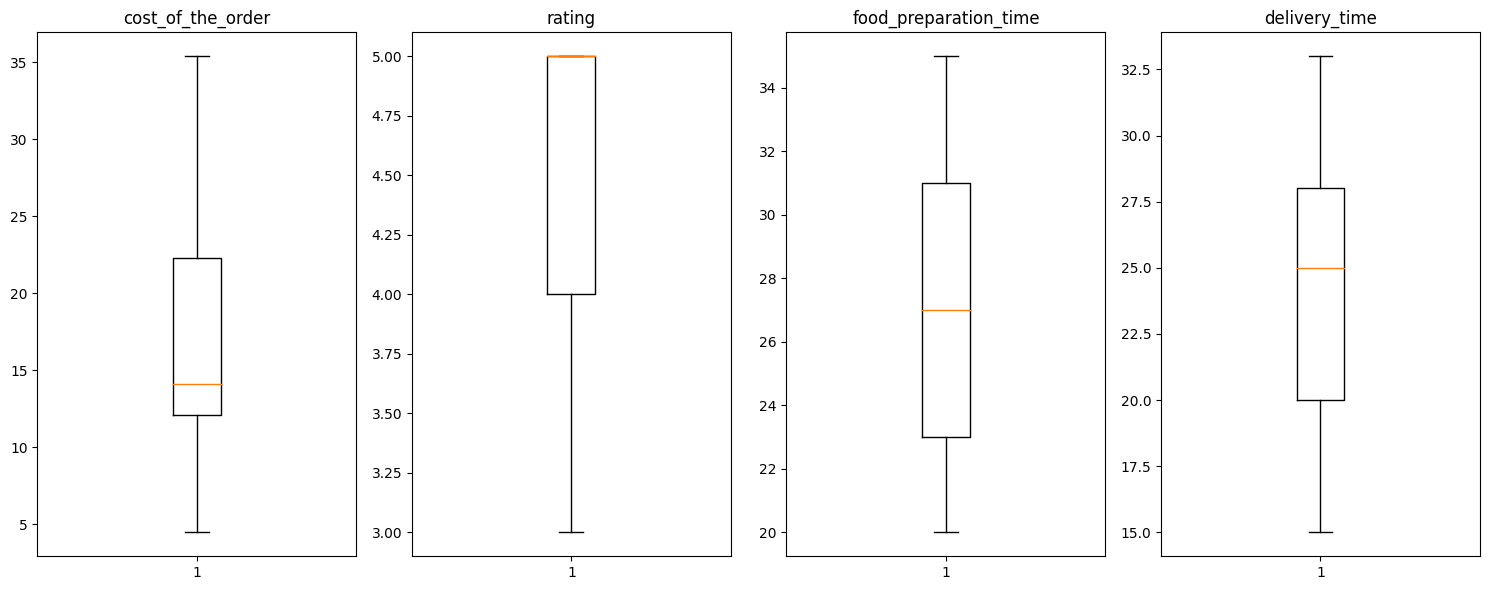

In [14]:
plt.figure(figsize=(15, 6))

for i, variable in enumerate(numerical_columns):
    # Filter data so that we can complete boxplots.
    filtered_data = df[variable].dropna(axis=0)


    plt.subplot(1, 4, i + 1)
    plt.boxplot(filtered_data, whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

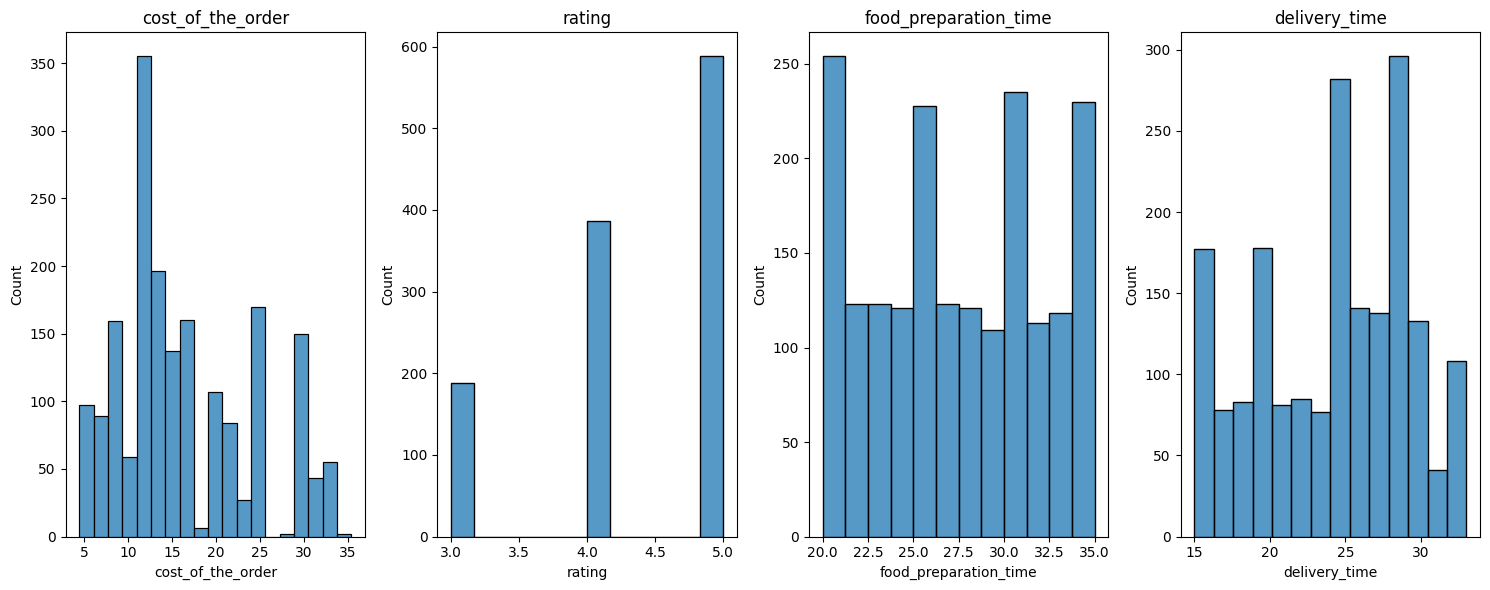

In [15]:
plt.figure(figsize=(15, 6))

for i, variable in enumerate(numerical_columns):
    # Filter data so that we can complete boxplots.
    filtered_data = df[variable].dropna(axis=0)

    plt.subplot(1, 4, i + 1)
    sns.histplot(data=filtered_data)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [16]:
# Exprapolating rating percentages:
three_star_amount = df[(3 <= df['rating']) & (df['rating'] < 4)].shape[0]
four_star_amount = df[(4 <= df['rating']) & (df['rating'] < 5)].shape[0]
five_star_amount = df[df['rating'] > 4].shape[0]
total_non_nan = df['rating'].count()

print(f"Out of non-NaN values: \n{(three_star_amount / total_non_nan) * 100:.2f}% are 3 star, {(four_star_amount/ total_non_nan) * 100:.2f}% are 4 star, and {(five_star_amount / total_non_nan) * 100:.2f}% are 5 star.")

Out of non-NaN values: 
16.18% are 3 star, 33.22% are 4 star, and 50.60% are 5 star.


#### Observations:

From the numerical columns we can get the following univariate analysis:
  - The cost_of_the_order appears to be normally distributed with a slight skewness to the right. This means that more people are ordering cheaper orders than what the mean is.
  - The ratings distribution for non-NaN values are: 16.18% are 3 star, 33.22% are 4 star, and 50.60% are 5 star.
  - For food preparation time, we have what looks like a uniform distribution with peaks at certain time periods. These periods are 20 mins, 25 mins, 30 mins, and 35 mins. These repeat significantly more than other preparation times in the data set.
  - delivery time could be seen as a normal distribution with a skew to the left due to the higher density of data there. We can see clearly in the boxplot that more than 50% of the orders take more than 25 minutes to deliver. And we can also identify in the histogram that there is a significant amount of data that takes just under 25 minuts to deliver.


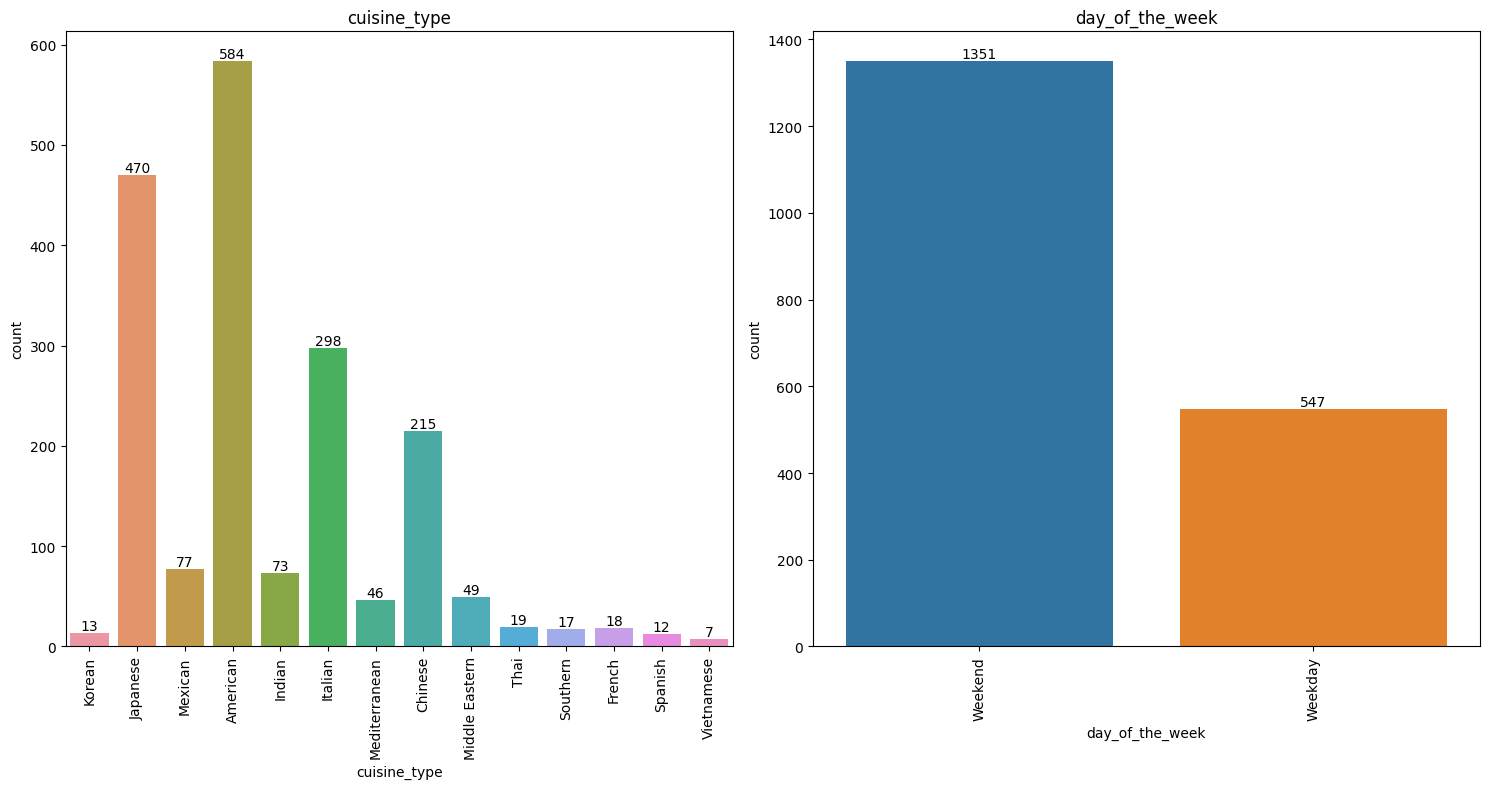

In [43]:
# Now we can perform countplots on the non-numerical data (excluding the id columns & the restaurante name column) to see the categories and distributions.
plt.figure(figsize=(15, 8))

for i, variable in enumerate(non_numerical_columns):
    plt.subplot(1, 2, i + 1)
    ax = sns.countplot(data=df, x=variable)
    for label in ax.containers:
      ax.bar_label(label)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(variable)

plt.show()

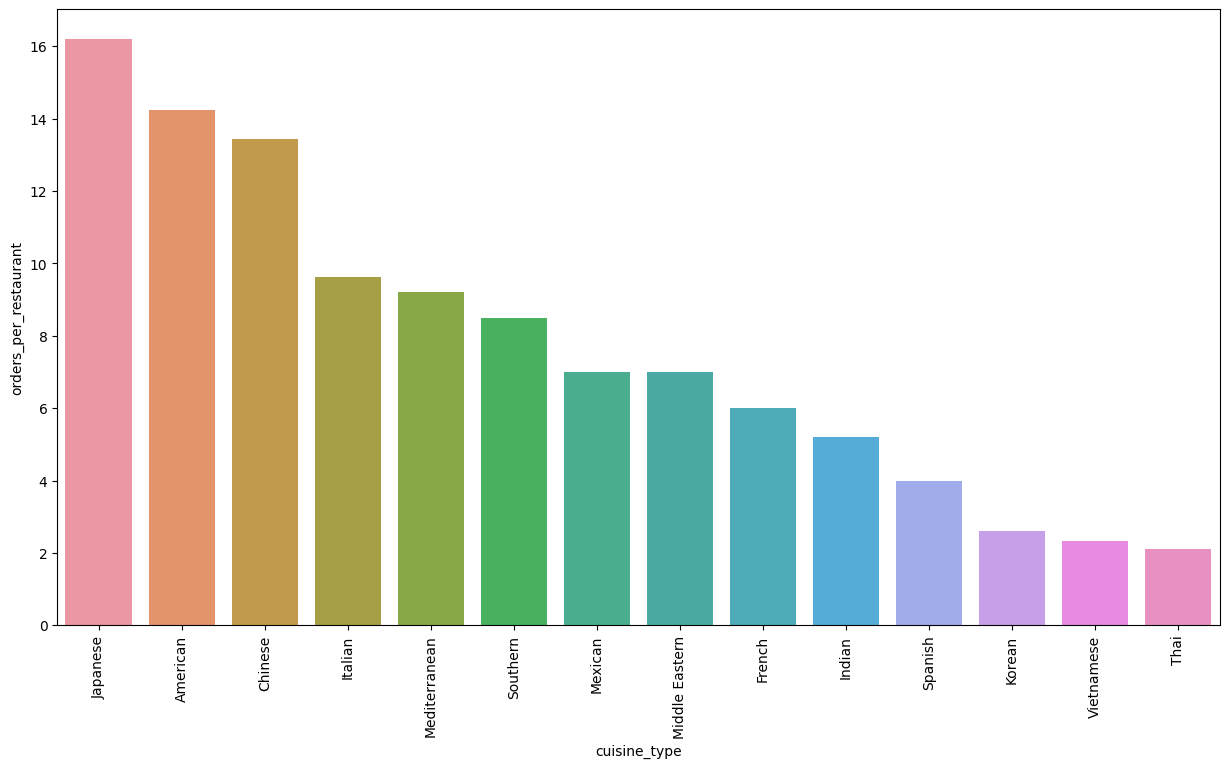

,cuisine_type,order_id,restaurant_name,orders_per_restaurant
0,Japanese,470,29,16.206897
1,American,584,41,14.243902
2,Chinese,215,16,13.437500
3,Italian,298,31,9.612903
4,Mediterranean,46,5,9.200000
5,Southern,17,2,8.500000
6,Mexican,77,11,7.000000
7,Middle Eastern,49,7,7.000000
8,French,18,3,6.000000
9,Indian,73,14,5.214286


In [18]:
# Lets see the number of restaurants per category:
df_restaurants_per_cuisine = df.groupby("cuisine_type").nunique()
df_restaurants_per_cuisine = df_restaurants_per_cuisine[['order_id', 'restaurant_name']]
df_restaurants_per_cuisine["orders_per_restaurant"] = df_restaurants_per_cuisine['order_id'] / df_restaurants_per_cuisine['restaurant_name']
df_restaurants_per_cuisine.sort_values(by=['orders_per_restaurant'], ascending=False, inplace=True)
df_restaurants_per_cuisine.reset_index(inplace=True)

plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_restaurants_per_cuisine, x="cuisine_type", y="orders_per_restaurant")
plt.xticks(rotation=90)
plt.show()
df_restaurants_per_cuisine

#### Observations:
From the previous two graphs:
  - The most popuular cuisine type is "American" followed by japanese, italian, and chinese.
  - These 4 restaurant types have a significantly larger order count than all other restaurants and most likely represent more than 80% of orders.
  - However, Japanese apperas to have a higher popularity per restaurant than American food. Having a higher order intake per restaurant.
  - Most orders are done during the weekend with a ratio of more than 2:1 between weekend to weekday orders.

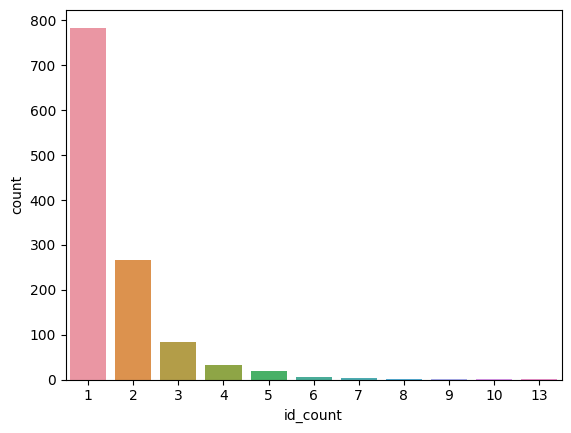

,count,mean,std,min,25%,50%,75%,max
customer_id,1200.0,177202.828333,117661.960754,1311.0,77543.0,133212.0,294304.0,405334.0
id_count,1200.0,1.581667,1.090560,1.0,1.0,1.0,2.0,13.0


In [19]:
# We can also check to see how many times a single customer ordered.
customer_counts_df = df.groupby(['customer_id'])['customer_id'].count().to_frame('id_count')
customer_counts_df.reset_index(inplace=True)

sns.countplot(data=customer_counts_df, x='id_count')
plt.show()

customer_counts_df.describe().T

#### Observations:
  - Most people on the app only order once, according to their customer_id.
  - 75% of the data is concentrated within 2 orders per customer, and the maximum order count by a single customer is 13.
  -This means that the website might have a customer retention problem.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Write the code here'
restaurant_df = df.groupby(['restaurant_name'])["restaurant_name"].count().sort_values(ascending=False).to_frame('restaurant_count')
restaurant_df.head()

,restaurant_count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The restaurants with the highest number of orders were the following:
  1. Shake Shack with 219 orders
  2. The Meatball Show with 132 orders
  3. Blue Ribbon Sushi with 119 orders
  4. Blue Ribbon Fired Chicken with 96 orders.
  5. Parm with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here
weekend_df = df[df['day_of_the_week'] == "Weekend"].groupby(['cuisine_type'])["cuisine_type"].count().sort_values(ascending=False).to_frame('cuisine_count_weekends')
weekend_df.head()

,cuisine_count_weekends
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
The most popular cuisine on weekends is **American** with 415 orders. This is followed by Japanese, Italian, Chinese and Mexican.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here
perc_more_than_20 = df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]
print(f"{perc_more_than_20 * 100:.2f}%")

29.24%


#### Observations:
29.24% of all orders have a cost of more than 20 usd.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Write the code here
order_delivery_time_mean = df['delivery_time'].mean()
order_delivery_time_mean

24.161749209694417

#### Observations:

The order delivery time mean is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Write the code here

# We can utilize the data we found for customer frequency and get the 3 largest with the nlargest function.
customer_counts_df.nlargest(3,['id_count'])

,customer_id,id_count
116,52832,13
84,47440,10
333,83287,9


#### Observations:
The customer ids are:
  - **52832** with 13 orders
  - **47440** with 10 orders
  - **83287** with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


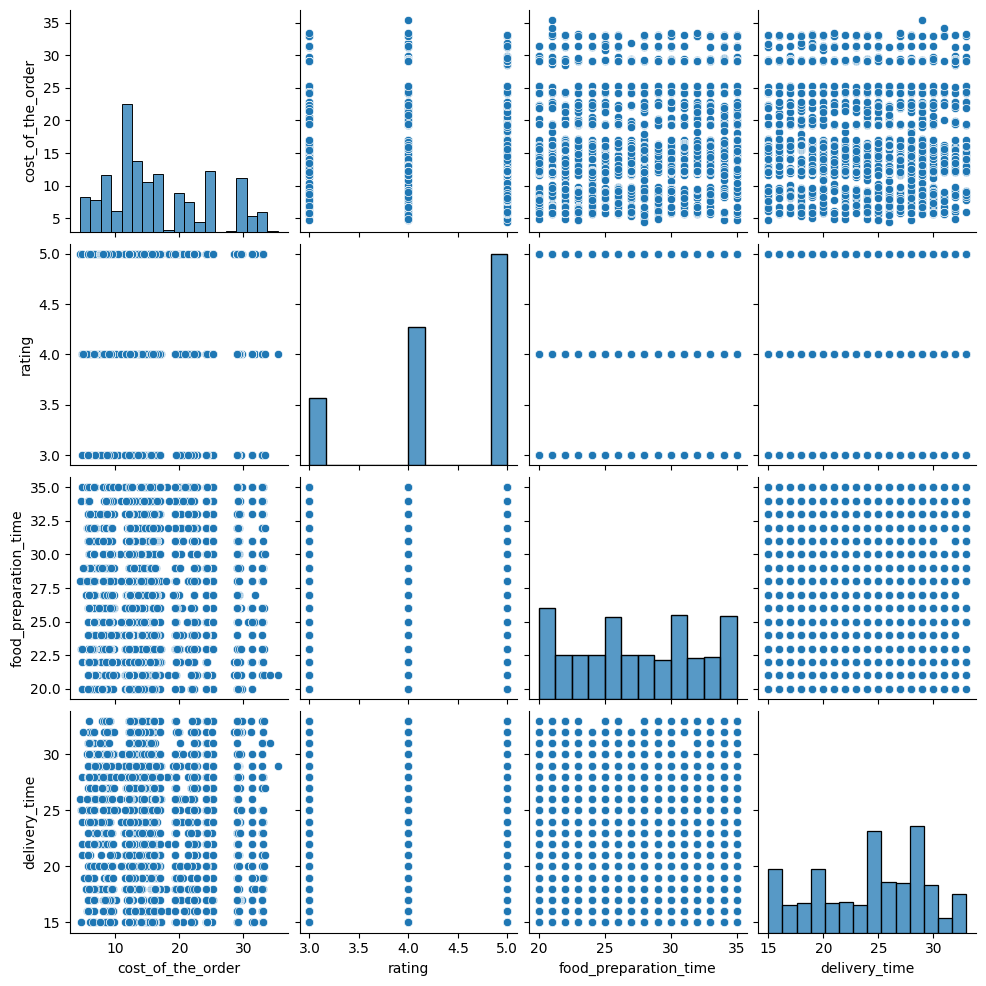

In [25]:
# Write the code here

# First we can start by comparing all numerical values with a pariplot and a heatmap to guage their correlation between them.
sns.pairplot(data=df, vars=numerical_columns)
plt.show()


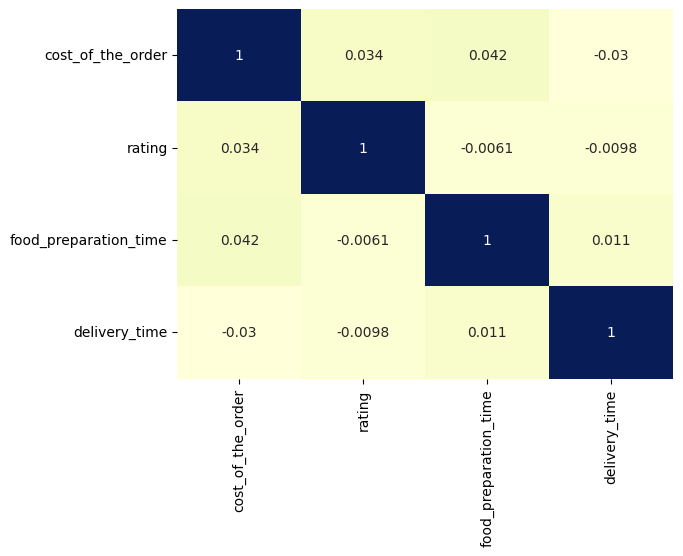

In [26]:
sns.heatmap(data=df[numerical_columns].corr(), annot=True, cbar=False, cmap='YlGnBu')
plt.show()

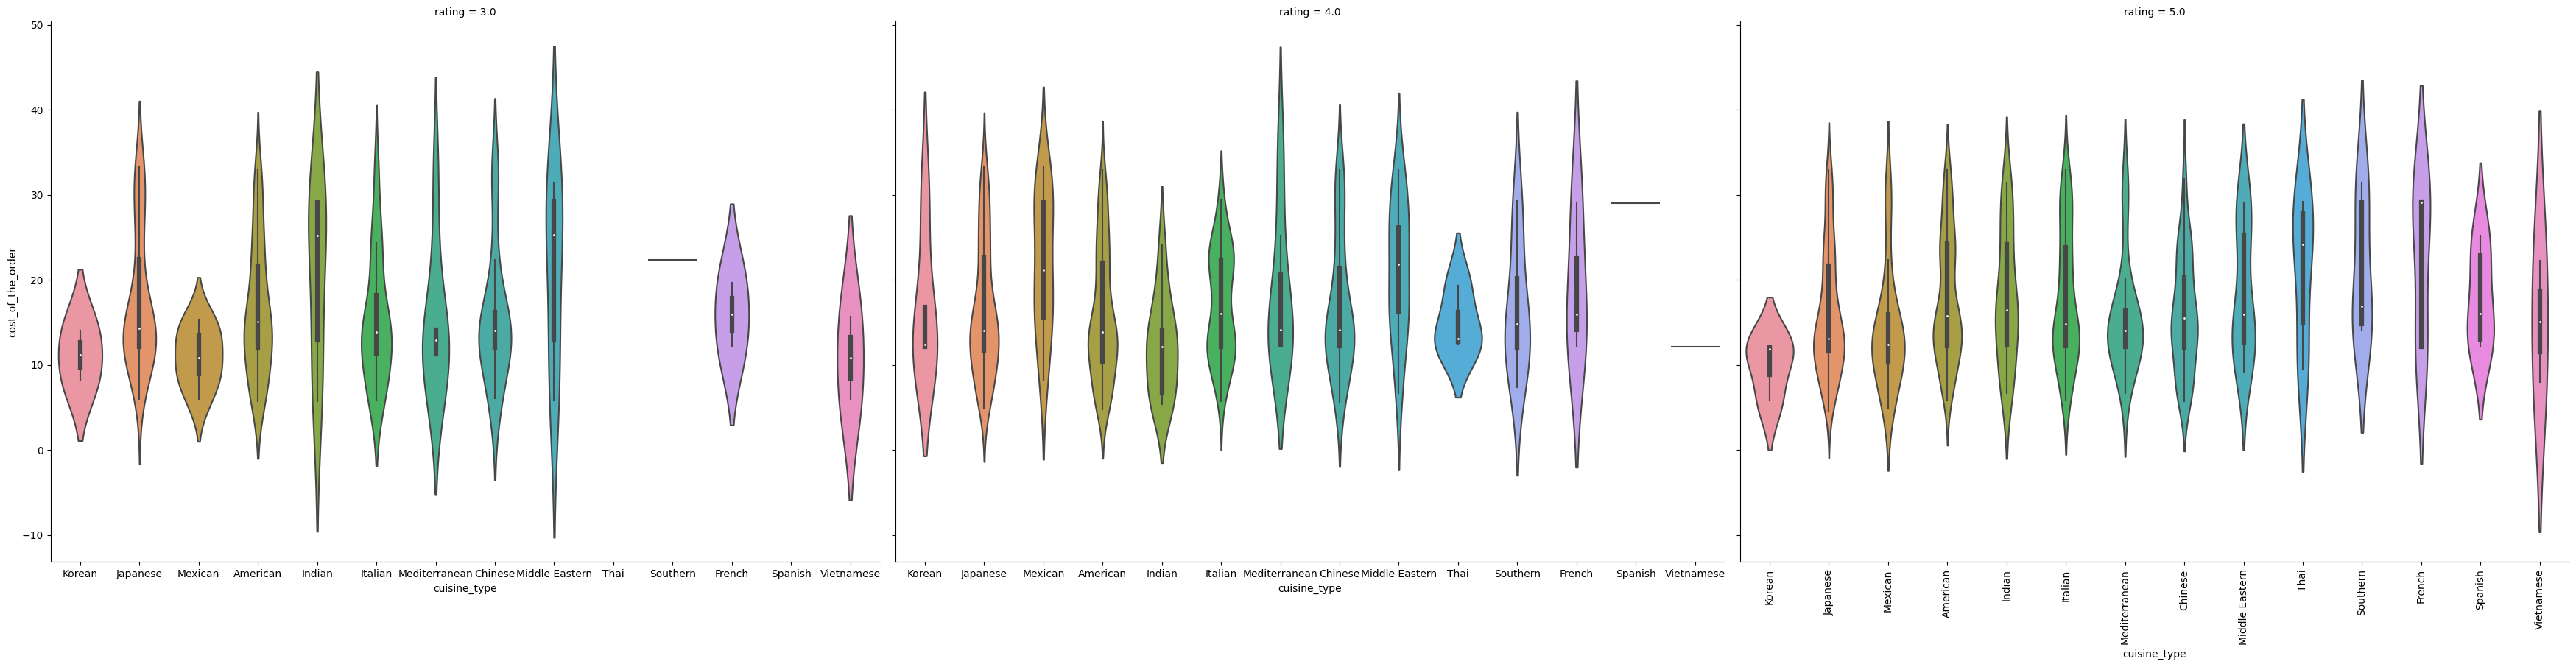

cuisine_type    rating
American        3.0       16.475313
                4.0       15.825000
                5.0       17.675345
Chinese         3.0       15.438750
                4.0       16.822750
                5.0       16.077826
French          3.0       15.935000
                4.0       19.113333
                5.0       22.332000
Indian          3.0       20.428000
                4.0       12.101538
                5.0       17.928438
Italian         3.0       15.229643
                4.0       17.124259
                5.0       17.736000
Japanese        3.0       17.400250
                4.0       16.470000
                5.0       15.968873
Korean          3.0       11.160000
                4.0       16.542500
                5.0        9.930000
Mediterranean   3.0       14.654444
                4.0       18.260000
                5.0       15.553125
Mexican         3.0       10.953333
                4.0       21.856250
                5.0       14.150385
Middl

In [27]:
sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order", col="rating", kind="violin", height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

df.groupby(by = ['cuisine_type', 'rating'])['cost_of_the_order'].mean()

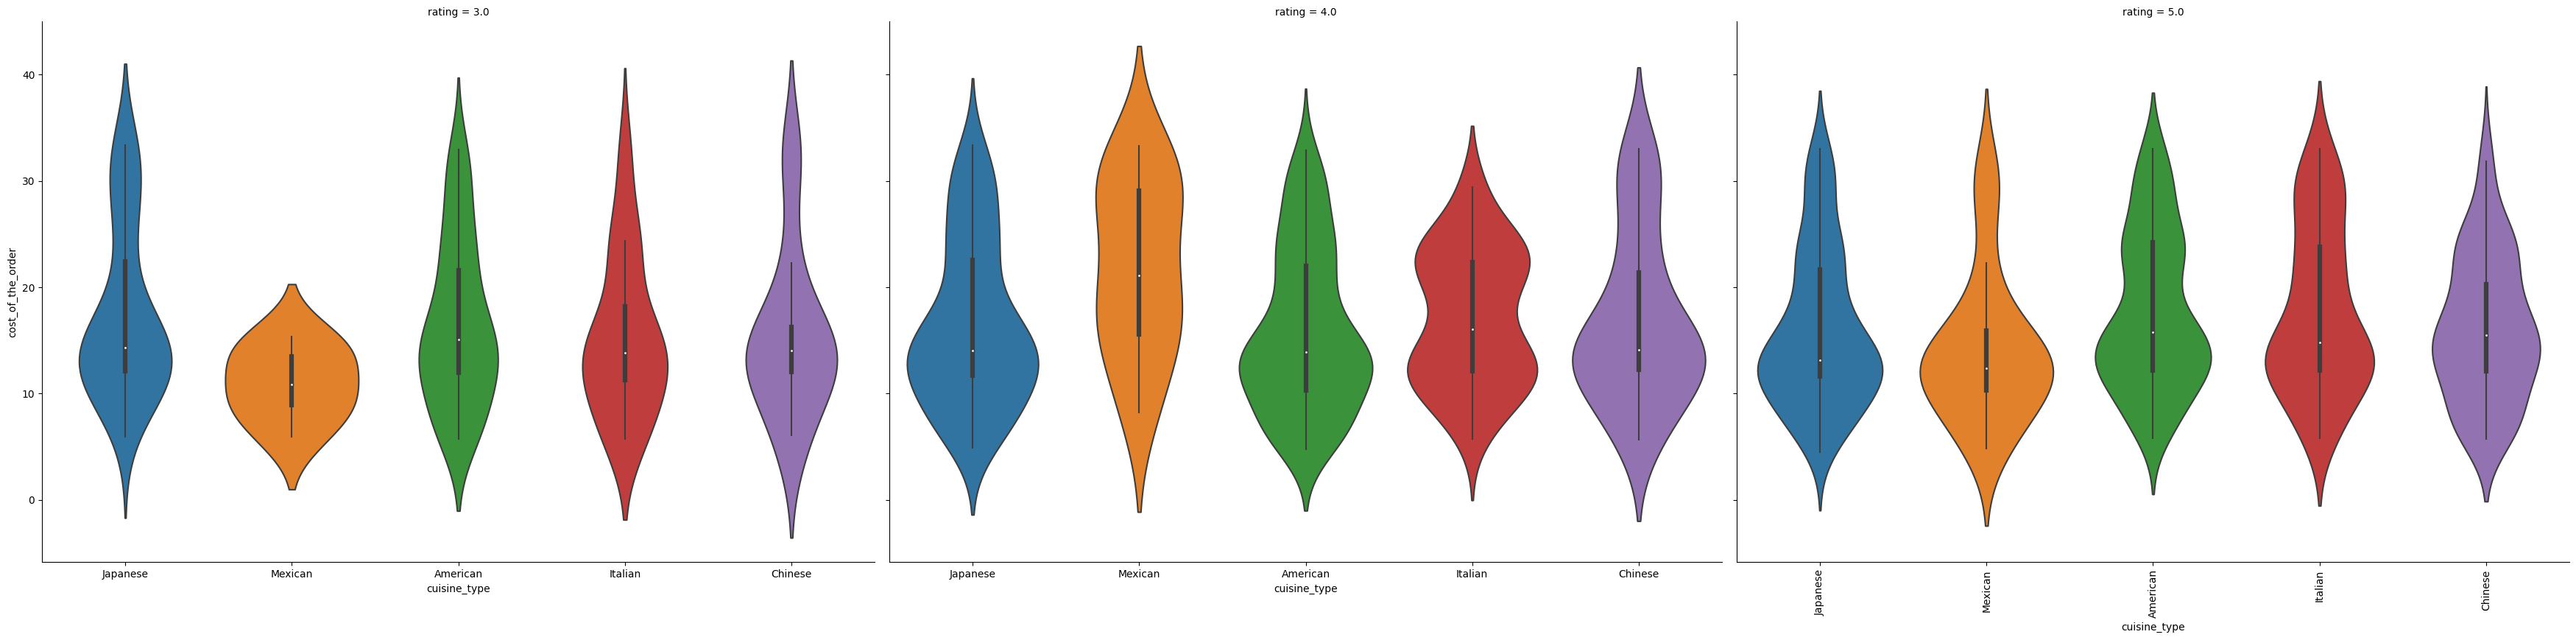

In [28]:
# Focusing the previous graph to the top 5 cuisine types (which all have above 50 orders)
n = 5
most_popular_cuisines = list(df_restaurants_per_cuisine.nlargest(n, "order_id")['cuisine_type'])

df_most_popular_cuisines = df[df['cuisine_type'].isin(most_popular_cuisines)]

sns.catplot(data=df_most_popular_cuisines, x="cuisine_type", y="cost_of_the_order", col="rating", kind="violin", height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

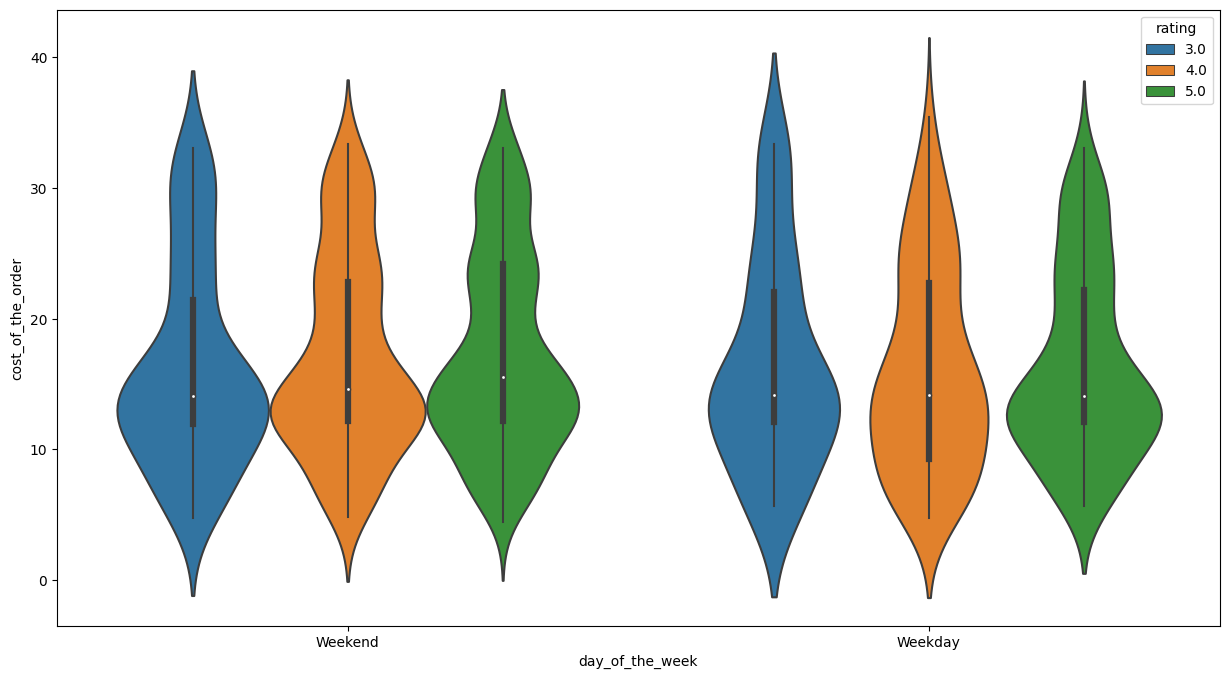

In [29]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=df, x='day_of_the_week', y='cost_of_the_order', hue='rating', orient='v')
plt.show()

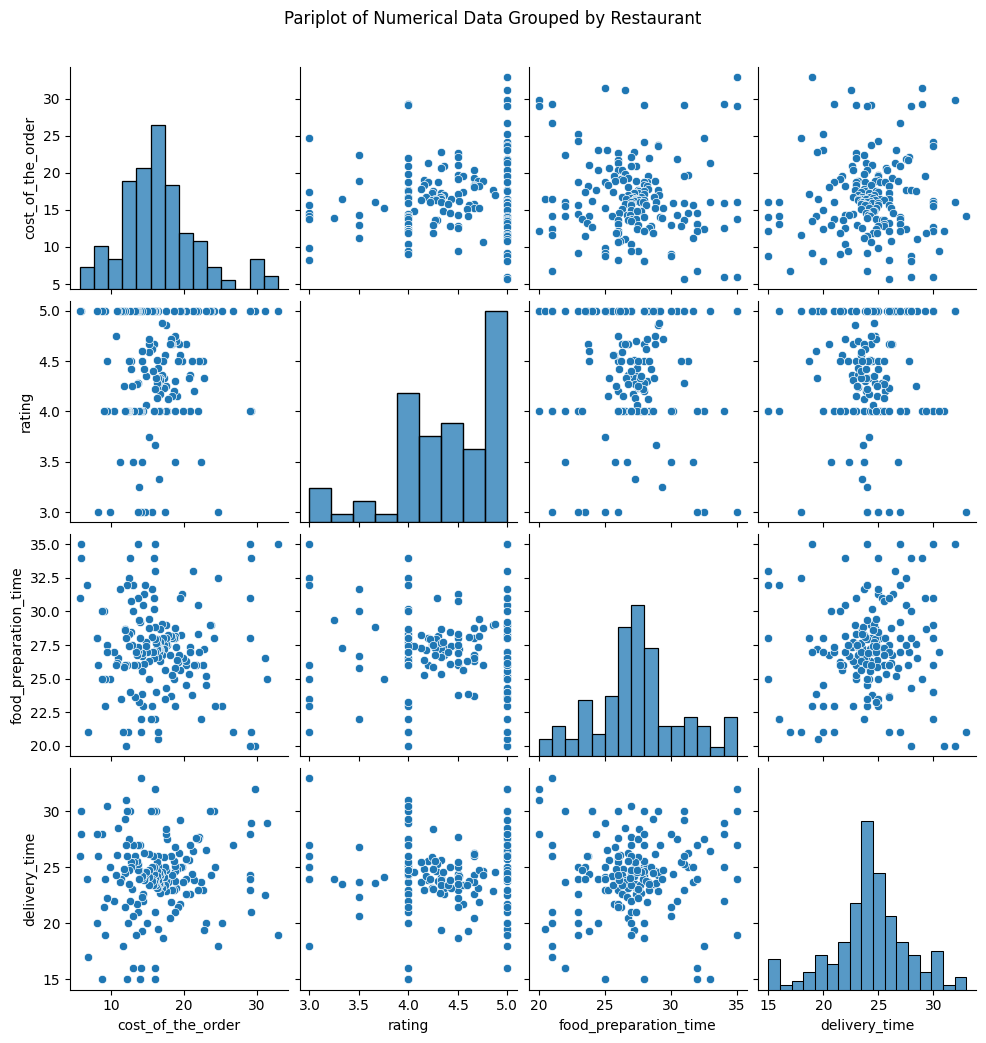

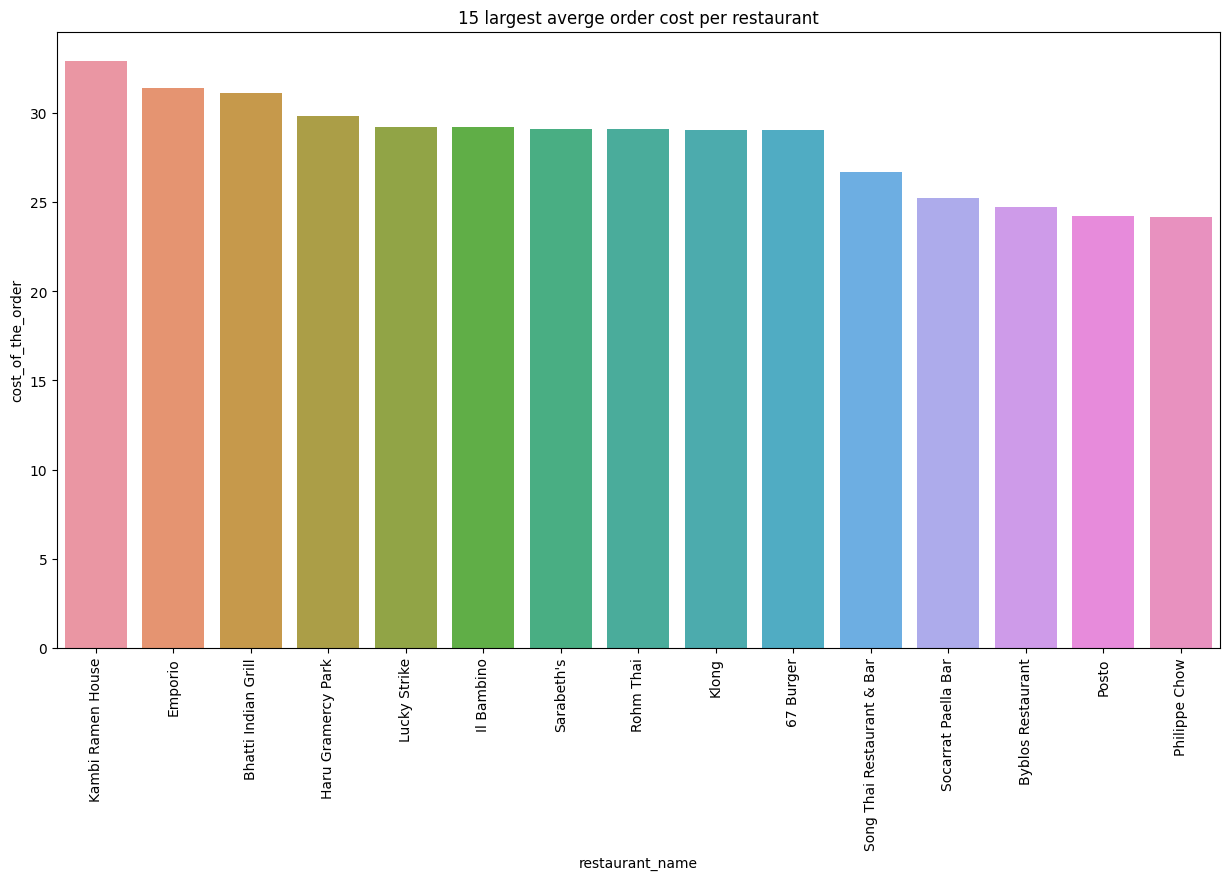

In [30]:
# Grouping the numerical data by restaurant name.
df_by_restaurant_mean = df.groupby("restaurant_name").mean(numeric_only=True).sort_values(by=['cost_of_the_order'], ascending=False).reset_index()
g = sns.pairplot(data=df_by_restaurant_mean, vars=numerical_columns)
g.fig.suptitle("Pariplot of Numerical Data Grouped by Restaurant", y=1.04)


# Top 15 avg. cost of order per restaurant.
df_by_restaurant_mean_15_largest = df_by_restaurant_mean.iloc[:15]
plt.figure(figsize=(15, 8))
plt.title("15 largest averge order cost per restaurant")
ax = sns.barplot(data=df_by_restaurant_mean_15_largest, x="restaurant_name", y="cost_of_the_order")
plt.xticks(rotation=90)
plt.show()


The total number of restaurants is: 178


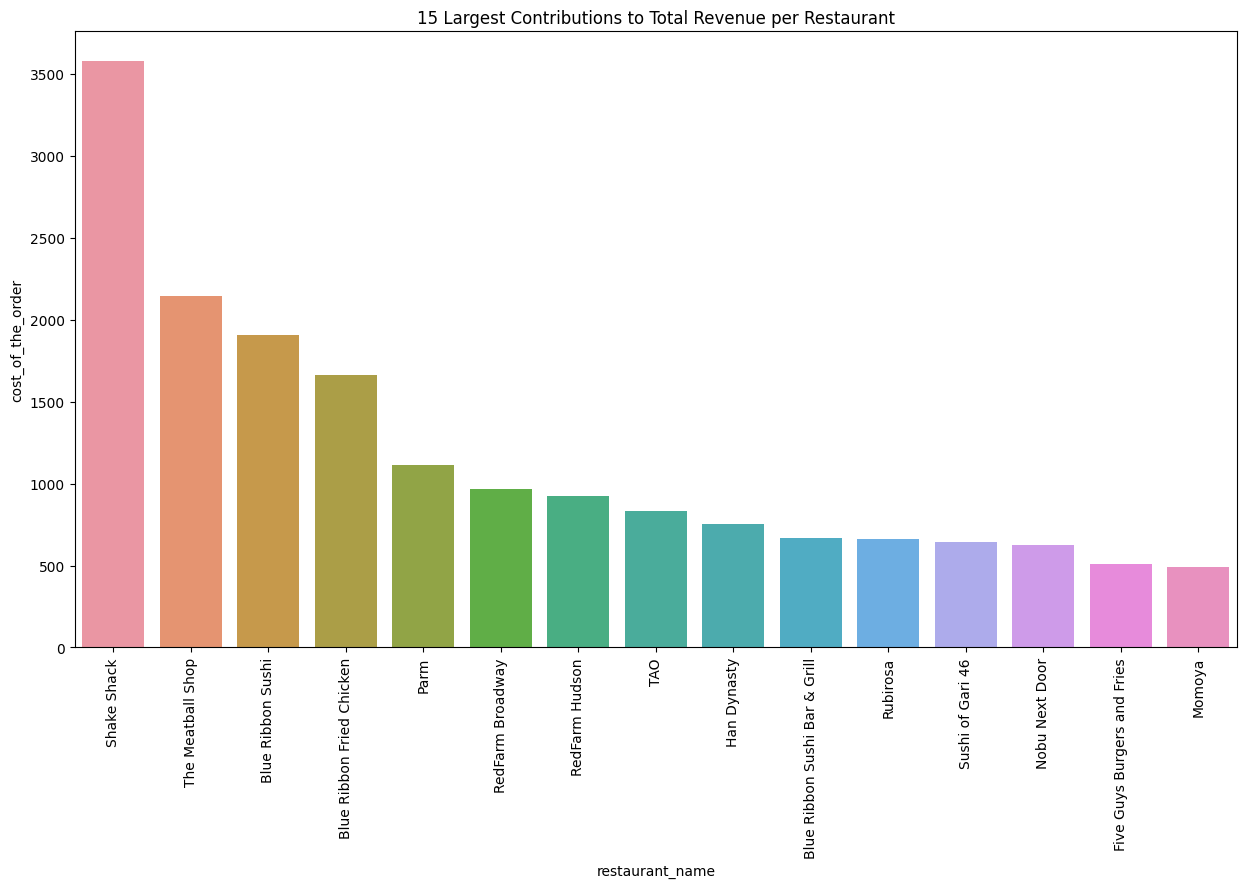

<ipython-input-31-d3a56cddfa03>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_largest_pie_chart.loc[len(df_for_largest_pie_chart.index)] = ["Other", 100 - (df_for_largest_pie_chart['% of total'].sum())]


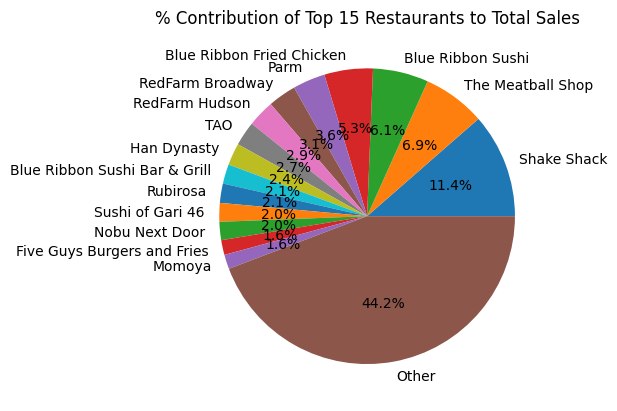

In [31]:
# Highest Contribution per Restaurant
df_by_restaurant_sum = df.groupby("restaurant_name").sum(numeric_only=True).sort_values(by=['cost_of_the_order'], ascending=False).reset_index()
print(f"The total number of restaurants is: {df_by_restaurant_sum.shape[0]}")

# Top 15 avg. cost of order per restaurant. Also plot average line to see if any is signifncantly above.
df_by_restaurant_sum_15_largest = df_by_restaurant_sum.iloc[:15].copy()
plt.figure(figsize=(15, 8))
plt.title("15 Largest Contributions to Total Revenue per Restaurant")
ax = sns.barplot(data=df_by_restaurant_sum_15_largest, x="restaurant_name", y="cost_of_the_order")
plt.xticks(rotation=90)
plt.show()

# Percentage of total sales by top 20 restaurant contributors.
total_sales = df['cost_of_the_order'].sum()
df_by_restaurant_sum_15_largest['% of total'] = (df_by_restaurant_sum_15_largest['cost_of_the_order'] / total_sales) * 100
df_for_largest_pie_chart = df_by_restaurant_sum_15_largest[['restaurant_name', '% of total']]
df_for_largest_pie_chart.loc[len(df_for_largest_pie_chart.index)] = ["Other", 100 - (df_for_largest_pie_chart['% of total'].sum())]
plt.title("% Contribution of Top 15 Restaurants to Total Sales")
plt.pie(df_for_largest_pie_chart['% of total'], labels=df_for_largest_pie_chart['restaurant_name'], autopct='%.1f%%')


plt.show()

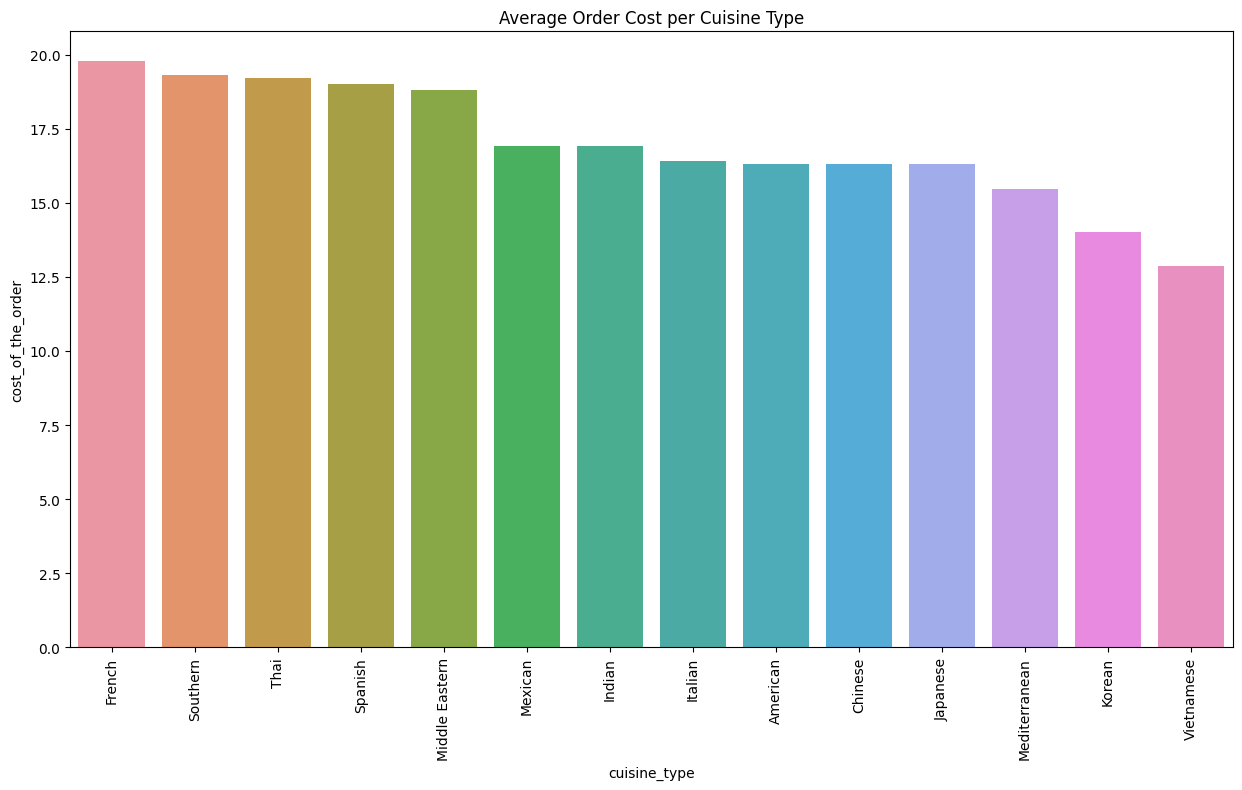

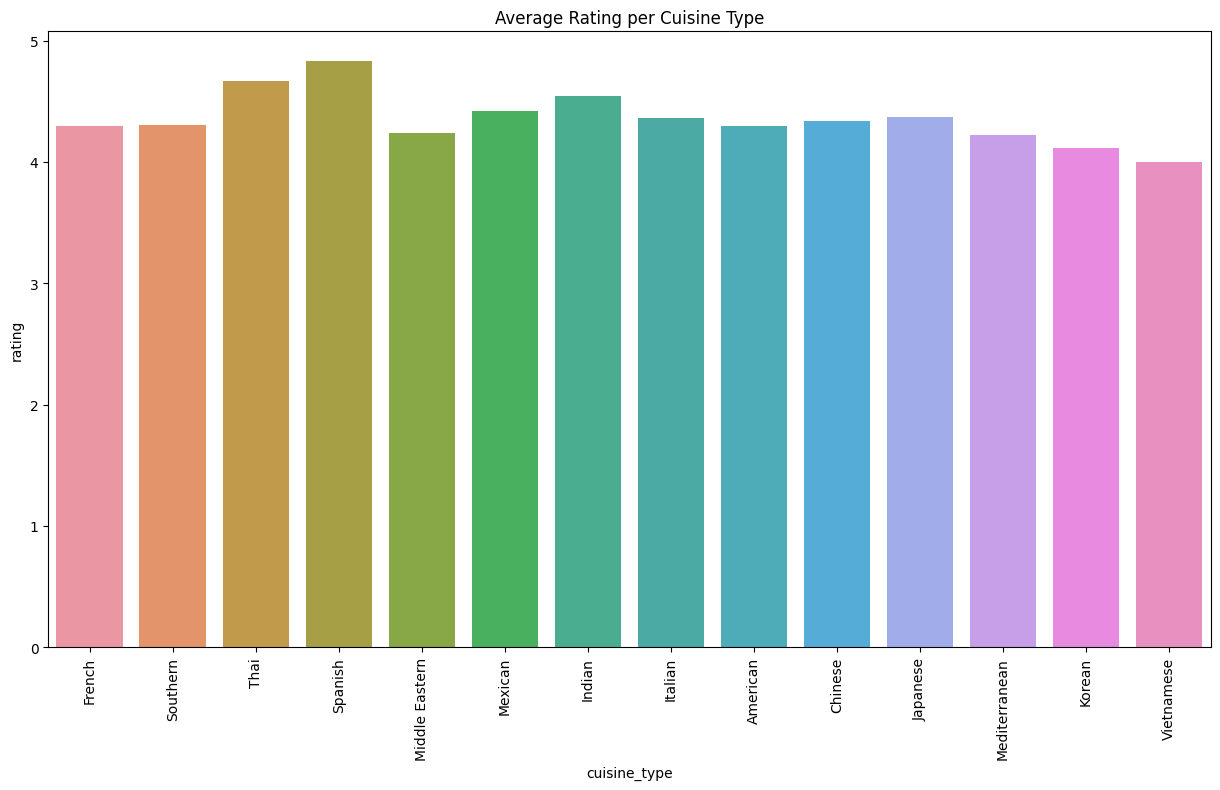

In [39]:
# Grouping the numerical data by restaurant name.
df_by_cuisine_mean = df.groupby("cuisine_type").mean(numeric_only=True).sort_values(by=['cost_of_the_order'], ascending=False).reset_index()

plt.figure(figsize=(15, 8))
plt.title("Average Order Cost per Cuisine Type")
ax = sns.barplot(data=df_by_cuisine_mean, x="cuisine_type", y="cost_of_the_order")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 8))
plt.title("Average Rating per Cuisine Type")
ax = sns.barplot(data=df_by_cuisine_mean, x="cuisine_type", y="rating")
plt.xticks(rotation=90)
plt.show()

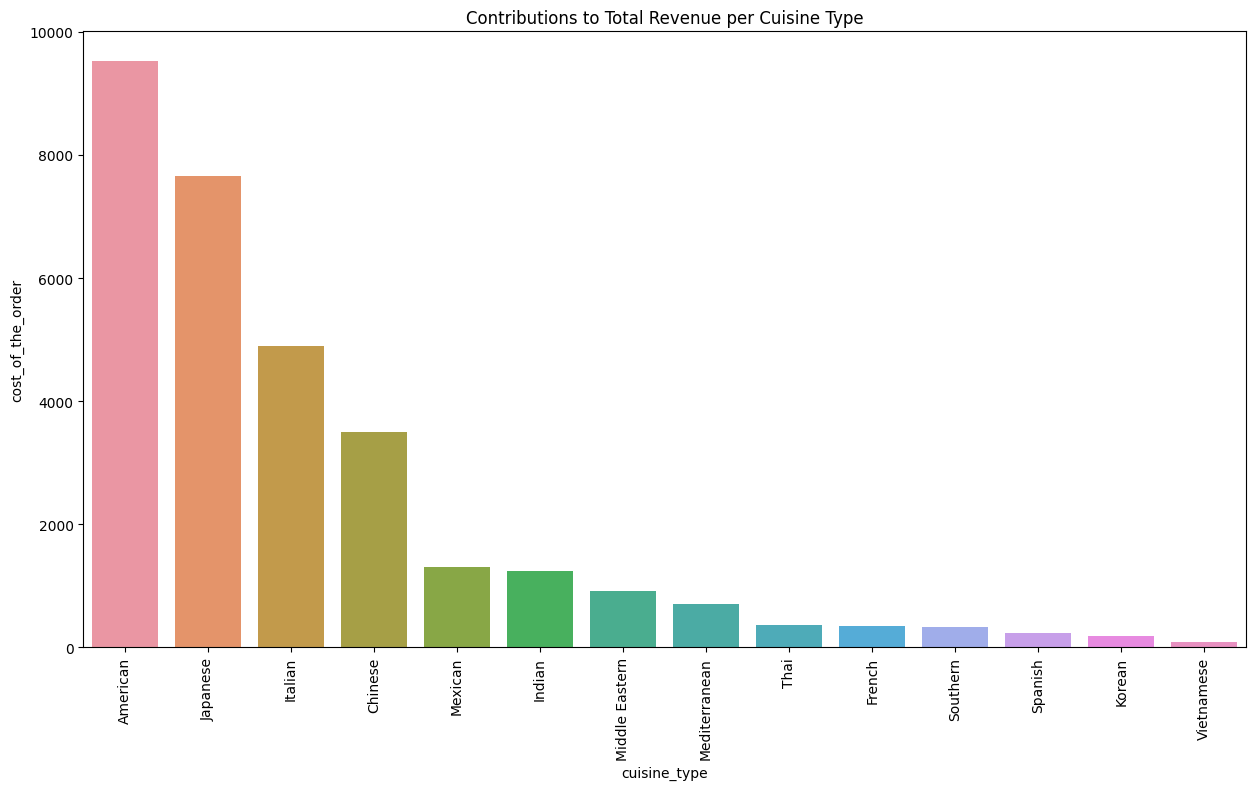

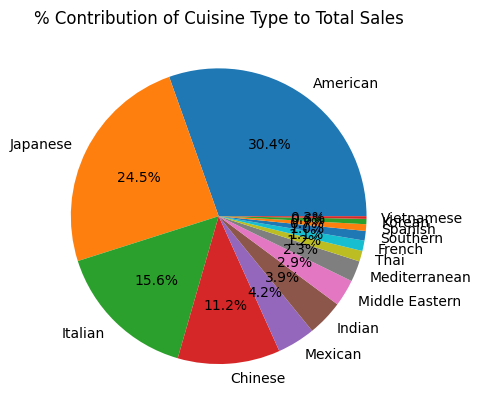

In [33]:
# Repeating the previous graphs but for cuisine type.
# Highest Contribution per Restaurant
df_by_cuisine_sum = df.groupby("cuisine_type").sum(numeric_only=True).sort_values(by=['cost_of_the_order'], ascending=False).reset_index()


# Top 15 avg. cost of order per restaurant. Also plot average line to see if any is signifncantly above.
plt.figure(figsize=(15, 8))
plt.title("Contributions to Total Revenue per Cuisine Type")
ax = sns.barplot(data=df_by_cuisine_sum, x="cuisine_type", y="cost_of_the_order")
plt.xticks(rotation=90)
plt.show()

# Percentage of total sales by top 20 restaurant contributors.
df_by_cuisine_sum['% of total'] = (df_by_cuisine_sum['cost_of_the_order'] / total_sales) * 100
df_by_cuisine_sum_pie_chart = df_by_cuisine_sum[['cuisine_type', '% of total']]
plt.title("% Contribution of Cuisine Type to Total Sales")
plt.pie(df_by_cuisine_sum['% of total'], labels=df_by_cuisine_sum['cuisine_type'], autopct='%.1f%%')


plt.show()

#### Observations:
  - There are no correlations between any two numerical variables as seen by both the pairplot as well as the correlation matrix.
  - There is also no correlation between price, rating and cuisine type. With different cuisine types boasting different price frequencies and that does not affect the overall price range over different ratings. I.e. a higher rating does not equate to a higher price tag.
  - This also holds up when comparing the cost of the order across different days of the week and ratings. All distributions are right skewed and have similar points for their median, which is around \$14 usd.

When grouping the dataset by restaurant name, and averaging out the numerical variables we can see the following:
  - Once again in the pairplot we cannot appreicate any correlation between any of the numerical values, but, as expected, the distributions of cost_of_the_order, rating, and both delivery times maintain their distribution.
  - We can also observer that only 10 restaurants have an average order cost of over \$25 dollars.

When grouping the dataset by restaurant name, and adding out the numerical varaibles we can see the following:
  - The top 15 restaurants contribute to ~56% of total sales, despite there being 178 restaurants in total. Which means the 8.4% of restaurants contribute to 56% of total sales.
  - The largest contributor by nearly over 2x any restaurant is Shake Shack with 11.4% of total sales.

When grouping the dataset by cuisine type, and averaging out the numerical variables we can see the following:
  - We can see that the average cost of the order is the highest for French, followed by Souther, Thai, and Spanish.
  - This however, does not correlate to these cuisine types having the higest average rating, with Spanish and Thai leading in that category.

When grouping the dataset by cuisine type, and adding out the numerical varaibles we can see the following:
  - Even with American food having the 9th highest average cost of order per cuisine type, they are by far the largest sales contributor, generationg 30.4% of total sales. They are also followed by Japanese which also rank low on the average cost of order, falling in 11th highest, but generating 24.5% of total sales.
  - The top 4 revenue contributors, American, Japanese, Italian, and Chinese, generate a combined 81.7% of total sales. Meaning the other 10 cuisine types only generate the other 18.3%.
  - This means that the current app is heavily dependent on a very limited amount of cuisines to generate most of their revenue.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [34]:
# Write the code here

count = df.groupby('restaurant_name')['rating'].count().to_frame("rating_count")
count["rating_mean"] =  df.groupby('restaurant_name')['rating'].mean()
count.reset_index(inplace=True)
count[(count['rating_count'] > 50) & (count['rating_mean'] > 4)]['restaurant_name']

20     Blue Ribbon Fried Chicken
21             Blue Ribbon Sushi
136                  Shake Shack
153            The Meatball Shop
Name: restaurant_name, dtype: object

#### Observations:
The promotional offerrs should go out to:
  - Blue Ribbon Fried Chicken
  - Blue Ribbon Sushi
  - Shake Shack
  - The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [42]:
# Write the code here

def rev_generated(order_cost):
  if order_cost > 20:
    return 0.25 * order_cost

  elif order_cost > 5:
    return 0.15 * order_cost

  else:
    return 0

df['rev_per_order'] = df['cost_of_the_order'].apply(rev_generated)
print(f"The revenue generated is: ${df['rev_per_order'].sum():,.2f}")
print(f"The total sales generated by the platform is: {df['cost_of_the_order'].sum():,.2f}, which is a gross margin of: {100 * df['rev_per_order'].sum() / df['cost_of_the_order'].sum():,.2f}%")

The revenue generated is: $6,166.30
The total sales generated by the platform is: 31,314.82, which is a gross margin of: 19.69%


#### Observations:
The overall revenue generated is \$6,166.30 for all of the orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

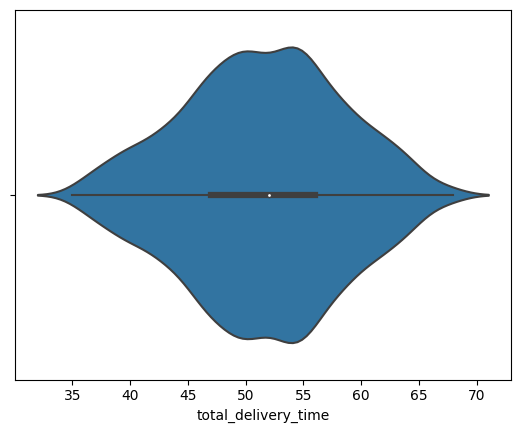


The percentage of orders that take more than 60 minutes is: 10.54%


In [36]:
# Write the code here
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
sns.violinplot(data=df, x='total_delivery_time')
plt.show()

print()
# Calculating % above 60 minutes.
print(f"The percentage of orders that take more than 60 minutes is: {(df[df['total_delivery_time'] > 60].shape[0] / df.shape[0]) * 100:.2f}%")


#### Observations:
The percentage of orders that take more than 60 minutes is: 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

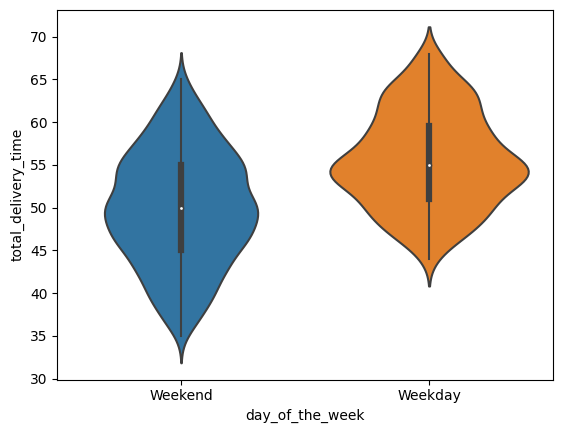

,day_of_the_week,mean_delivery,min_delivery,max_delivery
0,Weekday,55.552102,44,68
1,Weekend,49.906736,35,65


In [38]:
# Write the code here
sns.violinplot(data=df, x='day_of_the_week', y='total_delivery_time', orient='v')
plt.show()

df_by_day = df.groupby('day_of_the_week')['total_delivery_time'].mean().to_frame("mean_delivery")
df_by_day["min_delivery"] = df.groupby('day_of_the_week')['total_delivery_time'].min()
df_by_day["max_delivery"] = df.groupby('day_of_the_week')['total_delivery_time'].max()

df_by_day.reset_index()

#### Observations:
The mean delivery on the weekend is suprisingly lower than that seen during the weekdays. The average weekend delivery time is around 49.90 minutes, while during the weekdays it is 55.55 minutes. We can see that the distributions are also very different in our violin plot. In the weekend there is a variety of delivery periods ranging from 35 minutes up to 65, with a normal distribution. For weekday deliveries this is tighter but for worse, with the lowest delivery time being around 44 minutes and hte maximum at around 78. Along with that, it is concerning that the median delivery time during the weekday is closer to the Q3 value of delivery times during the weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# PERSONAL NOTE: Use Google Play & Uber Case Study from course to see expectations.

### Conclusions:
1. Although the app appears to have well rated orders, with most orders having a 5 star rating, and the average being close to 4.34 stars (out of rated orders), the platform has a customer retention problem. A high majority of their clients only orders once or twince and then has a significanly lower frequency after that.
2. Contrary to intuition, total order delivery time has no correlation to rating on the platform (however, it could be the reason customer retention is low).
3. The most popular cuisines by FAR are American, Japanese, Italian, and Chinese 80% of revenues for the platform.
4. The monetization of the app could be improved, as the company only retains 19.69% of total revenue generated by the platform with their current monetiztion scheme.
5. There are almost 2.5x more orders made on the weekend vs. the weekday, this impacts order delivery time with the weekends having to wait an average of 5.6 minuts more to recenive their order over weekday orders.
6. The companies top 5 restaurants generate an alarming 33.3% of their total sales, which means that only 5 out of 178 individual restaurants generate a third of total sales. If any of these restaurants where to have any trouble of close, it would be a gigantic loss for the company.
7. There is a need to better understand why customers either don't leave reviews, or why they left a poor review.

### Recommendations:

1. Improve customer retention through prizes, discounts or free meals. If customers only use the app once or twice then the app cohorts will dry up quickly and growth will stagnate or the company will lose sales.
2. Better understand poor customer retention. Is the waiting time too long? Is the restaurant quality on the app poor? What are other services doing better than we are?
3. Diversify restaurant orders for customers. Too many customers are ordering from the same restaurants, and if any of those restaurants fail there will be severe revenue decreases. To improve this you could give recomendations to other restaurants based on average rating on the platform.
4. Focus on reducing delivery times on weekends, clearly more customers are ordering on weekends and that is slowing down the service and reducing the quality of the app. You can most likely improve this by adding incentives to delivery people on weekends in order to make the existing delivery people more efficient, or incentivize other people to deliver on the weekends due to the incentives.


Improvement of Data Quality for Further Analysis:
1. Give out small prizes to clients who complete their restaurant reveiws after their order, this could better improve the data generated and give a better picture.
2. Create a categorical review system to add data to the reviews. The current rating system does not provide much information to either managmenet or the data team as to why a restaurant received a poor review. I.e poor food quallity, poor service, wrong items sent, delivery person was rude/mean, etc.
3. This study will provide better data once customer retention is higher. When customer retention is higher you can focus on understanding repeating patterns within customers so that you can improve the app even further.


---

In [45]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/UT AI Course/Module 1/Project 1/PYF_Project_LearnerNotebook_FullCode.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/UT AI Course/Module 1/Project 1/PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 2805871 bytes to /content/drive/MyDrive/UT AI Course/Module 1/Project 1/PYF_Project_LearnerNotebook_FullCode.html
